In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/174109630_3c544b8a2f.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg')]

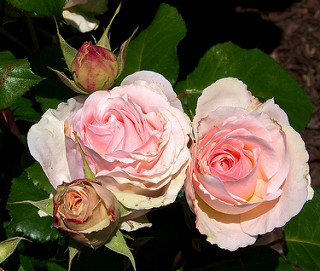

In [9]:
PIL.Image.open(str(roses[0]))

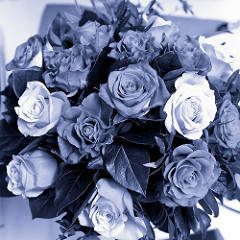

In [10]:
PIL.Image.open(str(roses[69]))

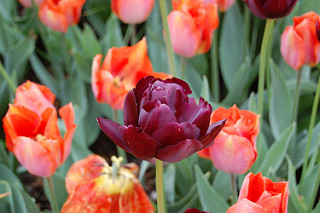

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}



In [13]:
flowers_images_dict['daisy'][:5] # paths

[PosixPath('datasets/flower_photos/daisy/14621687774_ec52811acd_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5944315415_2be8abeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 PosixPath('datasets/flower_photos/daisy/2646438199_b309cffd65_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/21805938544_bf6bb0e4bc.jpg')]

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) # receives a file path of the image, then change it to 3d numpy array pixels?
img

array([[[  1,  14,   6],
        [  3,  12,   2],
        [  6,  12,   1],
        ...,
        [ 22,  29,  44],
        [ 14,  22,  35],
        [ 10,  19,  29]],

       [[  1,  14,   6],
        [  1,  12,   2],
        [  3,  11,   1],
        ...,
        [ 27,  34,  49],
        [ 19,  27,  40],
        [ 15,  24,  34]],

       [[  0,  15,   4],
        [  0,  11,   1],
        [  2,   9,   2],
        ...,
        [ 31,  38,  53],
        [ 25,  33,  46],
        [ 19,  28,  38]],

       ...,

       [[ 87, 111, 139],
        [ 68,  84, 107],
        [ 36,  43,  58],
        ...,
        [  0,  38,  13],
        [  0,  40,  15],
        [  4,  46,  21]],

       [[ 48,  71, 116],
        [ 59,  85, 121],
        [ 51,  80, 101],
        ...,
        [  0,  40,  15],
        [  0,  38,  16],
        [  2,  40,  18]],

       [[ 46,  59, 111],
        [ 23,  56,  95],
        [ 64, 112, 136],
        ...,
        [  2,  42,  17],
        [  1,  39,  17],
        [  4,  40,  18]]

In [16]:
img.shape

(271, 320, 3)

In [17]:
resized_sample = cv2.resize(img, (180, 180))
resized_sample.shape

(180, 180, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [19]:
X[1]

array([[[247, 229, 150],
        [248, 225, 143],
        [248, 220, 136],
        ...,
        [149,  42,  38],
        [143,  40,  35],
        [157,  43,  35]],

       [[246, 227, 147],
        [246, 224, 141],
        [247, 220, 134],
        ...,
        [143,  41,  37],
        [140,  39,  35],
        [152,  42,  36]],

       [[246, 226, 141],
        [246, 223, 137],
        [245, 218, 132],
        ...,
        [148,  39,  39],
        [153,  37,  38],
        [168,  38,  38]],

       ...,

       [[188,  78,  64],
        [183,  78,  59],
        [182,  77,  58],
        ...,
        [105,  45,  56],
        [101,  44,  56],
        [114,  39,  55]],

       [[192,  76,  64],
        [183,  74,  62],
        [181,  74,  61],
        ...,
        [108,  45,  54],
        [ 98,  45,  52],
        [106,  41,  51]],

       [[201,  75,  65],
        [191,  73,  62],
        [187,  73,  62],
        ...,
        [102,  46,  51],
        [ 96,  45,  53],
        [107,  40,  54]]

In [20]:
y[1]

0

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
X = X / 255 # scaling data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
len(X_train)

2752

In [25]:
len(X_test)

918

In [26]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 161s 2s/step - loss: 1.3488 - accuracy: 0.4444
Epoch 2/5
86/86 [==============================] - 128s 1s/step - loss: 1.0095 - accuracy: 0.6068
Epoch 3/5
86/86 [==============================] - 135s 2s/step - loss: 0.8614 - accuracy: 0.6737
Epoch 4/5
86/86 [==============================] - 106s 1s/step - loss: 0.6723 - accuracy: 0.7522
Epoch 5/5
86/86 [==============================] - 97s 1s/step - loss: 0.4801 - accuracy: 0.8314


In [27]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 9s 301ms/step - loss: 1.0101 - accuracy: 0.6307


[1.0101022720336914, 0.6307189464569092]

In [28]:
predictions = model.predict(X_test)
predictions

29/29 [==============================] - 10s 341ms/step


array([[ 2.6635408 , 10.552488  ,  4.104075  , -2.1018152 , -2.1682503 ],
       [ 6.8290167 ,  1.1863121 , -6.827144  , -7.449461  ,  7.9076633 ],
       [ 0.38454142,  0.19467103, -0.31251773,  2.8145807 ,  1.1813831 ],
       ...,
       [-0.79570574, -3.5541217 , -0.92334676,  9.286102  ,  1.8233488 ],
       [ 6.452491  ,  1.681175  , -0.7704105 , -2.0004146 ,  1.7545887 ],
       [ 1.7107319 , -1.3773627 , -2.433085  ,  4.7567277 ,  2.2867022 ]],
      dtype=float32)

In [29]:
score = tf.nn.softmax(predictions[0])

In [30]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.7412910e-04, 9.9803978e-01, 1.5799288e-03, 3.1875254e-06,
       2.9826435e-06], dtype=float32)>

In [31]:
np.argmax(score)

1

In [32]:
y_test[0]

1

In [33]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3)
])

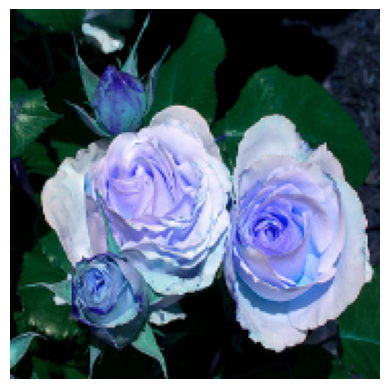

In [34]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))



In [ ]:
img_height  = 224 # for example
img_width = 224

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

In [ ]:
model.evaluate(X_test, y_test)